<a href="https://colab.research.google.com/github/ShaliniR8/Tensorflow-and-keras/blob/master/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

**IMPORT LIBRARIES**

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**LOAD DATA**

In [0]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

**PLOT EXAMPLES**

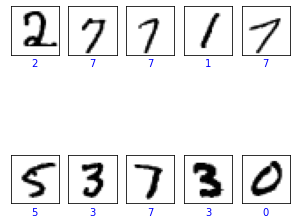

In [127]:
def plot_examples(x,y,p):

  indices=np.random.choice(range(len(x)),10)

  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(5,5))
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x[i], cmap='binary')
    col='blue' if y[i]==p[i] else 'red'
    plt.xlabel(str(y[i]), color=col)
    plt.xticks([])
    plt.yticks([])

  plt.show()

plot_examples(x_train,y_train,y_train)

**NORMALIZATION** : *Reshape*

In [128]:
print(x_train.shape, x_test.shape)
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


**NORMALIZATION** 

In [0]:
x_train=x_train/255
x_test=x_test/255


**NEURAL NETWORK MODEL**

In [130]:
#tanh -> relu ->softmax


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=x_train[0].shape),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
  

#model compile
model.compile(
    loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

model.summary()




Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


**TRAINING**

In [131]:
h = model.fit(
    x_train, y_train,
    validation_data=(x_test,y_test),
    epochs=30, batch_size=2048,
    verbose=2
)



Epoch 1/30
30/30 - 0s - loss: 1.8036 - accuracy: 0.4405 - val_loss: 1.1758 - val_accuracy: 0.7099
Epoch 2/30
30/30 - 1s - loss: 0.8395 - accuracy: 0.7888 - val_loss: 0.5672 - val_accuracy: 0.8475
Epoch 3/30
30/30 - 0s - loss: 0.4949 - accuracy: 0.8626 - val_loss: 0.4010 - val_accuracy: 0.8872
Epoch 4/30
30/30 - 0s - loss: 0.3804 - accuracy: 0.8928 - val_loss: 0.3303 - val_accuracy: 0.9070
Epoch 5/30
30/30 - 0s - loss: 0.3245 - accuracy: 0.9085 - val_loss: 0.2919 - val_accuracy: 0.9165
Epoch 6/30
30/30 - 0s - loss: 0.2904 - accuracy: 0.9171 - val_loss: 0.2673 - val_accuracy: 0.9232
Epoch 7/30
30/30 - 0s - loss: 0.2667 - accuracy: 0.9236 - val_loss: 0.2495 - val_accuracy: 0.9282
Epoch 8/30
30/30 - 0s - loss: 0.2480 - accuracy: 0.9283 - val_loss: 0.2348 - val_accuracy: 0.9322
Epoch 9/30
30/30 - 0s - loss: 0.2332 - accuracy: 0.9319 - val_loss: 0.2226 - val_accuracy: 0.9356
Epoch 10/30
30/30 - 0s - loss: 0.2198 - accuracy: 0.9365 - val_loss: 0.2131 - val_accuracy: 0.9366
Epoch 11/30
30/30 -

In [0]:
model.save('model.h5')

In [0]:
model=tf.keras.models.load_model('model.h5')



In [0]:
pred= model.predict(x_test)

In [0]:
x_test=np.reshape(x_test, (x_test.shape[0], 28, 28))

In [0]:
pred=np.argmax(pred, axis=1)

In [143]:
pred.shape
pred[1]

2

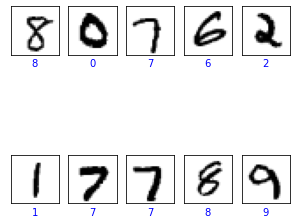

In [148]:
plot_examples(x_test,y_test,pred)